<a href="https://colab.research.google.com/github/Akash-mahandargi/Basic-Projects-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from docx import Document

# Read the CSV file
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

# Read the Word document
doc = Document('/content/Multiple Linear Regression.docx')
for para in doc.paragraphs:
    print(para.text)

display(df.head())

Multiple Linear Regression
Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs
Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model usi

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 16.3 MB/s eta 0:00:00


# Task
Using the data in "/content/ToyotaCorolla - MLR.csv", perform the tasks outlined in "/content/Multiple Linear Regression.docx". This includes exploratory data analysis, data preprocessing, building and evaluating three multiple linear regression models, and applying Lasso and Ridge regression. Explain all the code used to accomplish these tasks.

## Exploratory data analysis (eda)

### Subtask:
I will start by exploring the dataset to understand the variables, their distributions, and relationships. This will involve creating visualizations and summary statistics.


**Reasoning**:
I will start by generating summary statistics and checking for missing values to get a basic understanding of the data.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate summary statistics
display(df.describe())

# Check data types and missing values
df.info()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


**Reasoning**:
Now that I have a basic understanding of the data, I will visualize the distributions of the numerical and categorical features. This will help me to identify skewness, outliers, and the balance of categorical features.



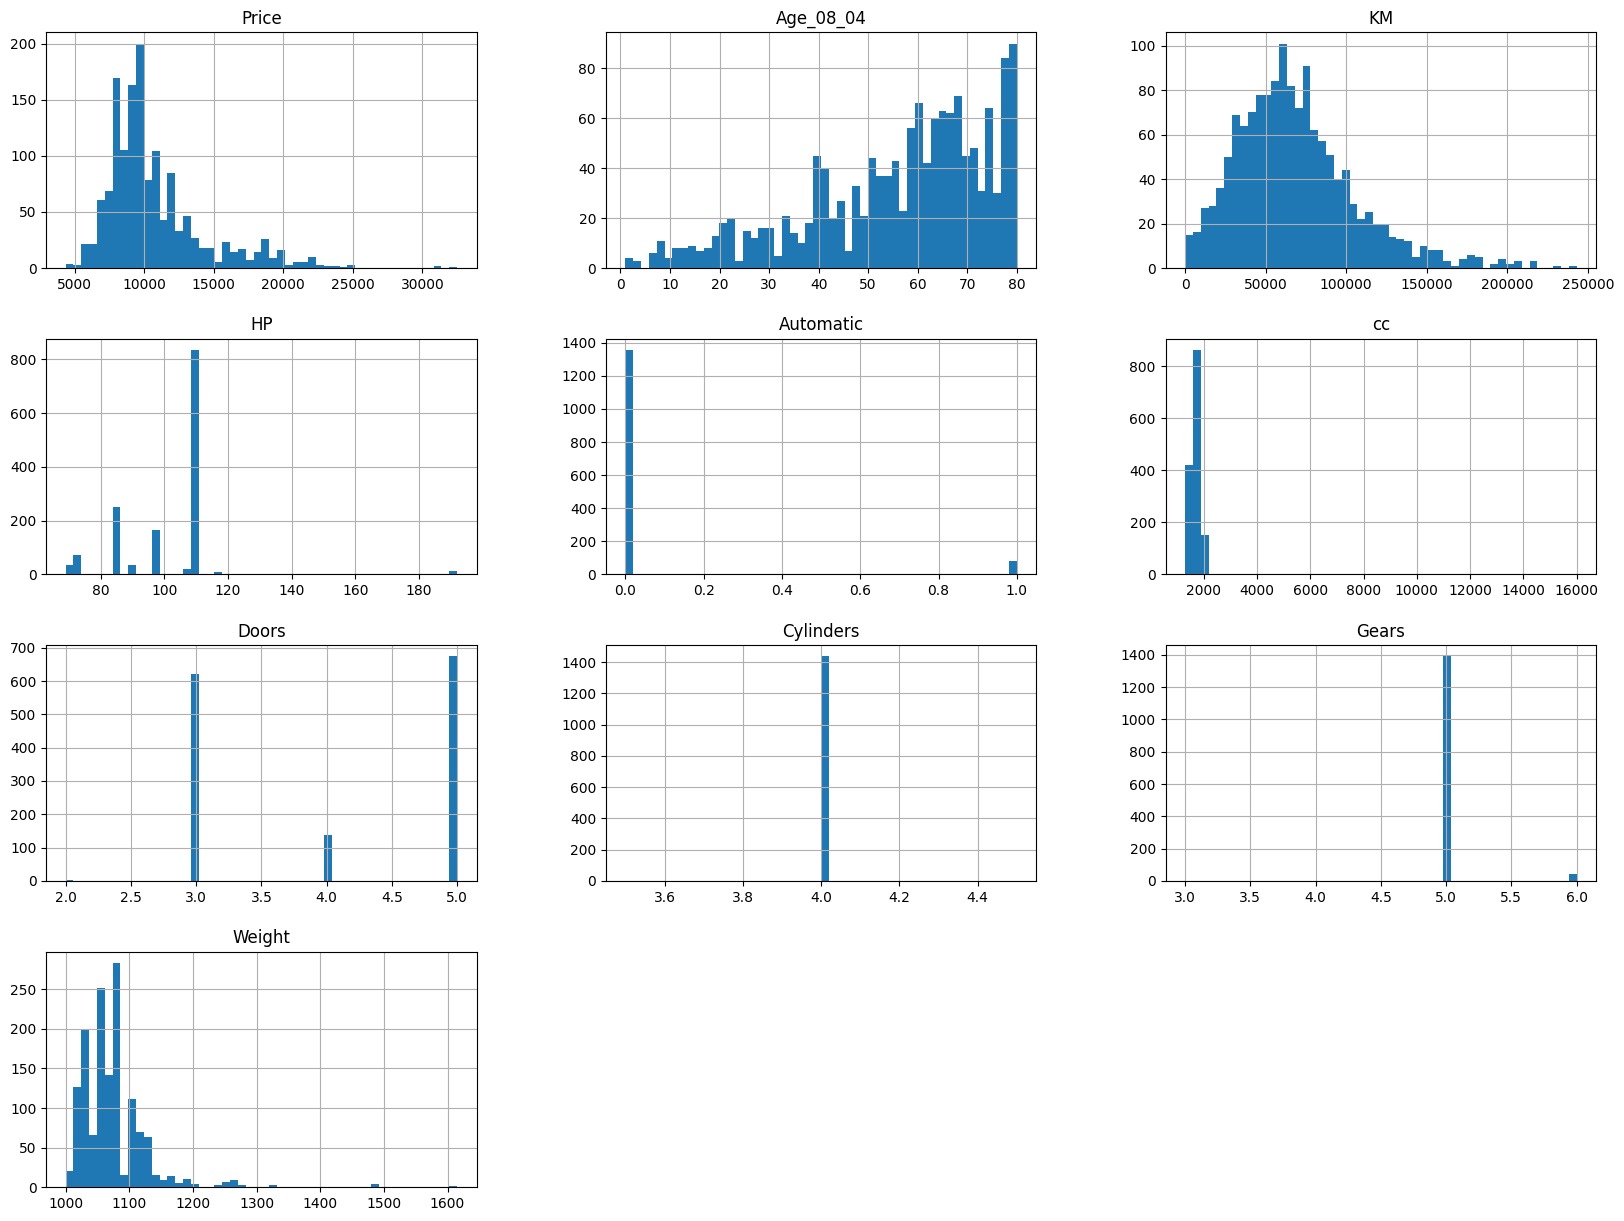

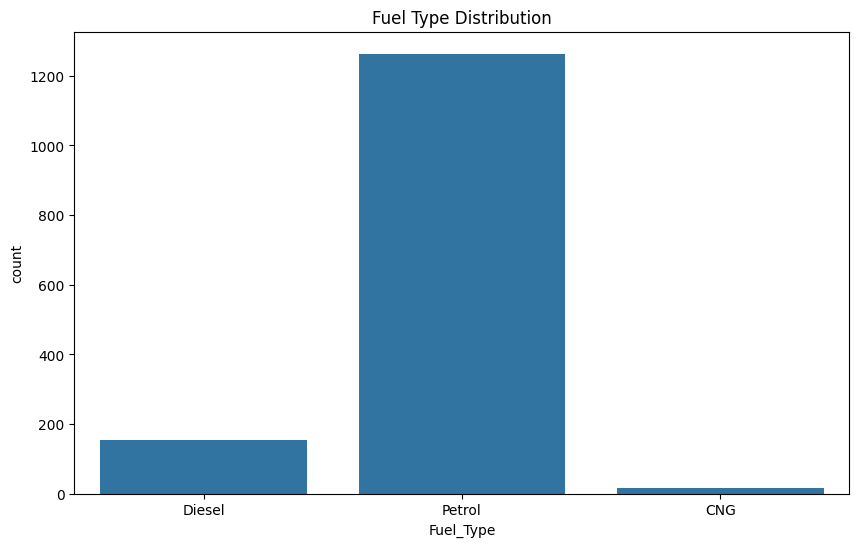

In [5]:
# Visualize numerical data distributions
df.hist(bins=50, figsize=(20,15))
plt.show()

# Visualize categorical data
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')
plt.show()

**Reasoning**:
To understand the relationships between the features and the target variable, 'Price', I will create scatter plots of each numerical feature against 'Price'. This will help me to visually assess the correlation between them and identify potential predictors for the regression model.



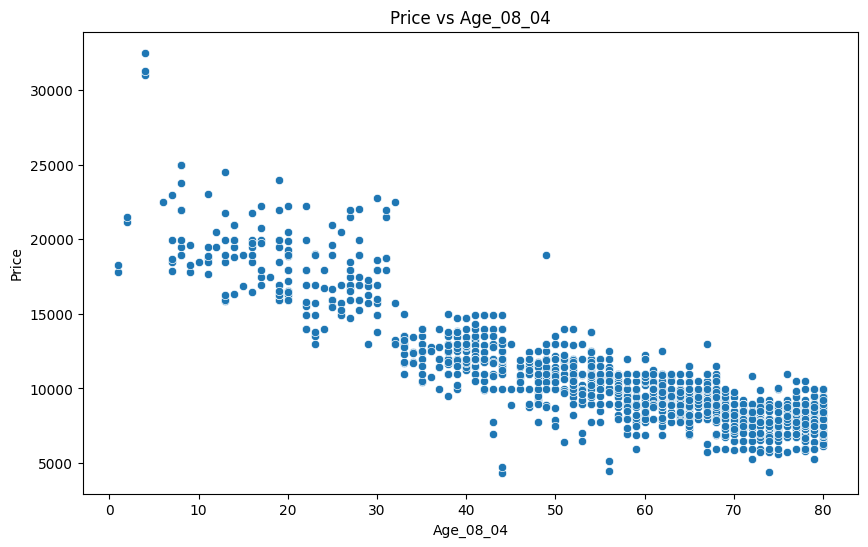

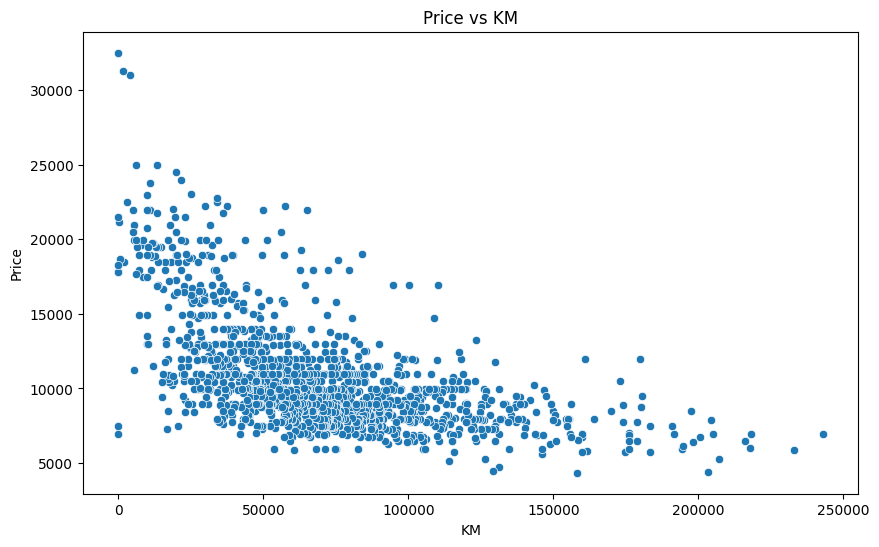

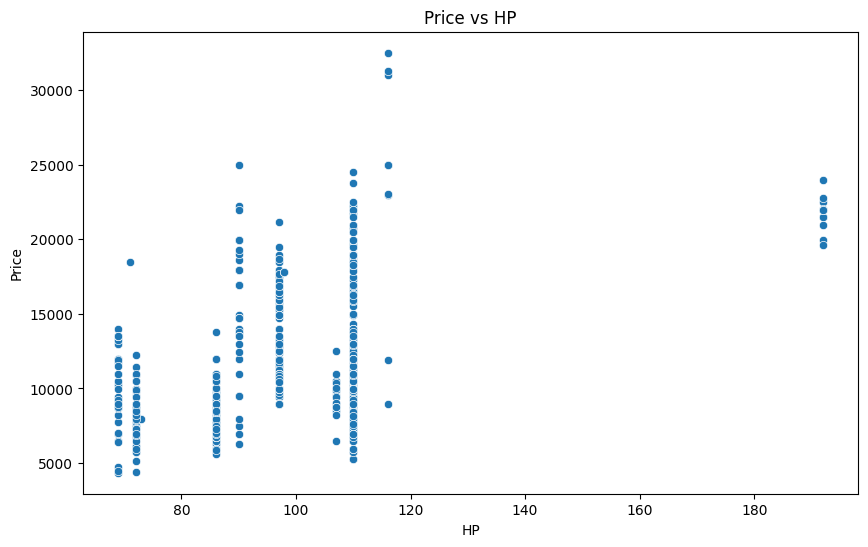

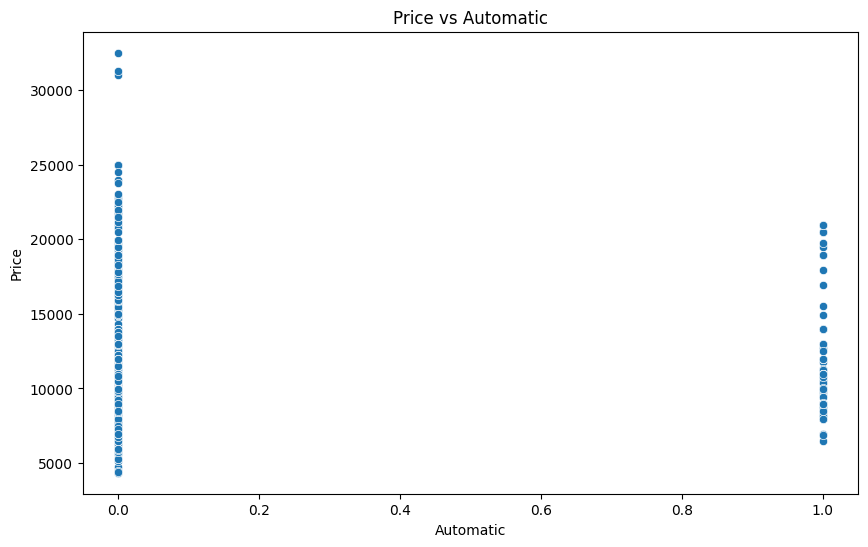

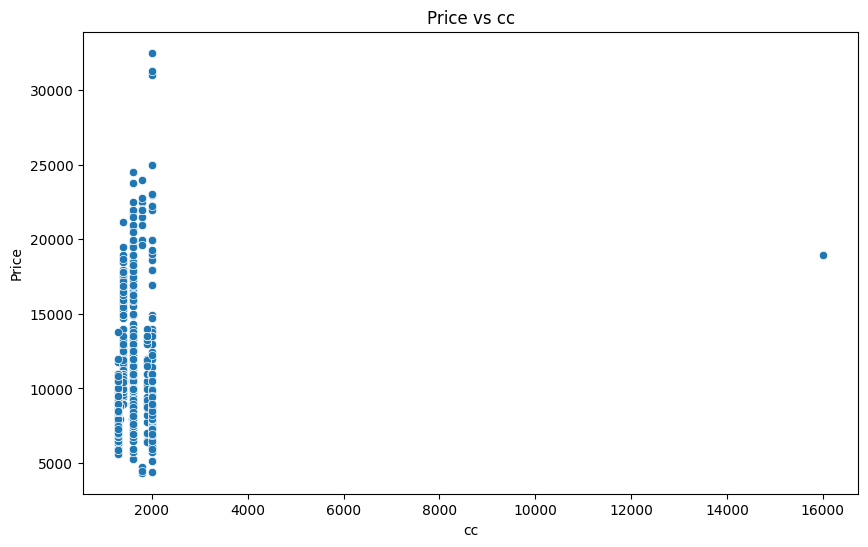

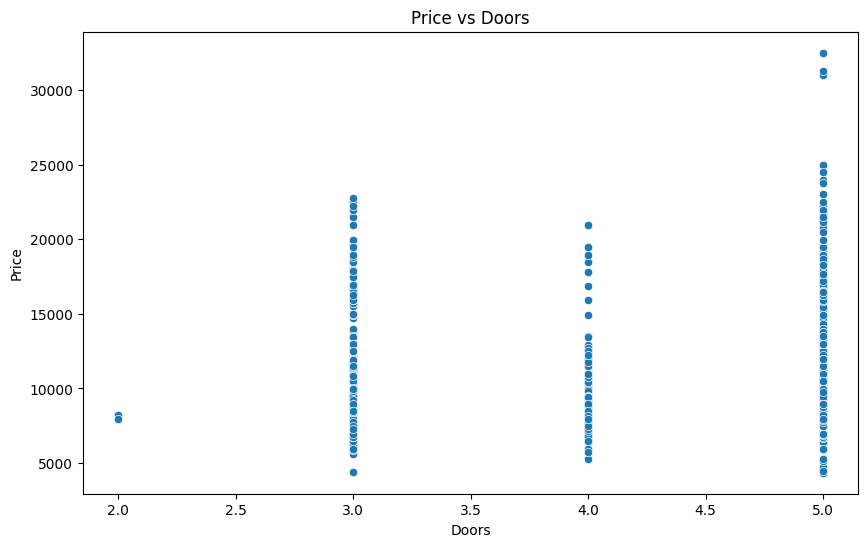

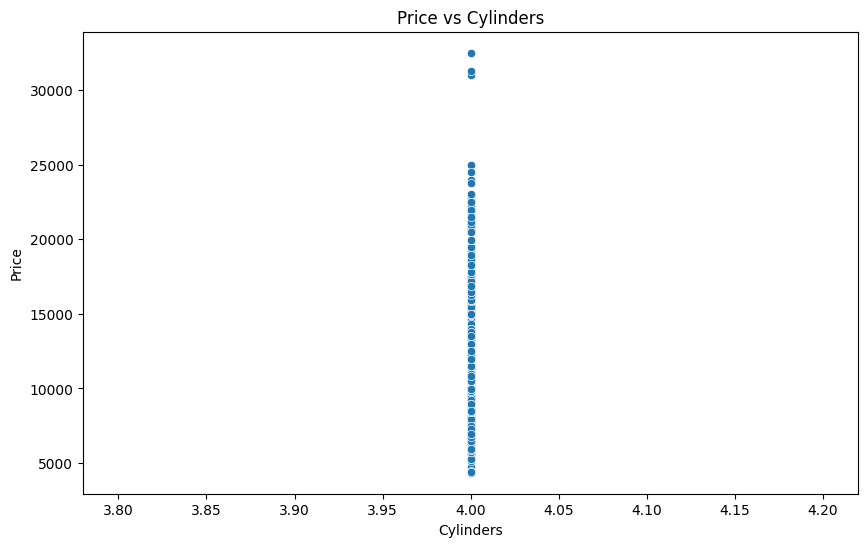

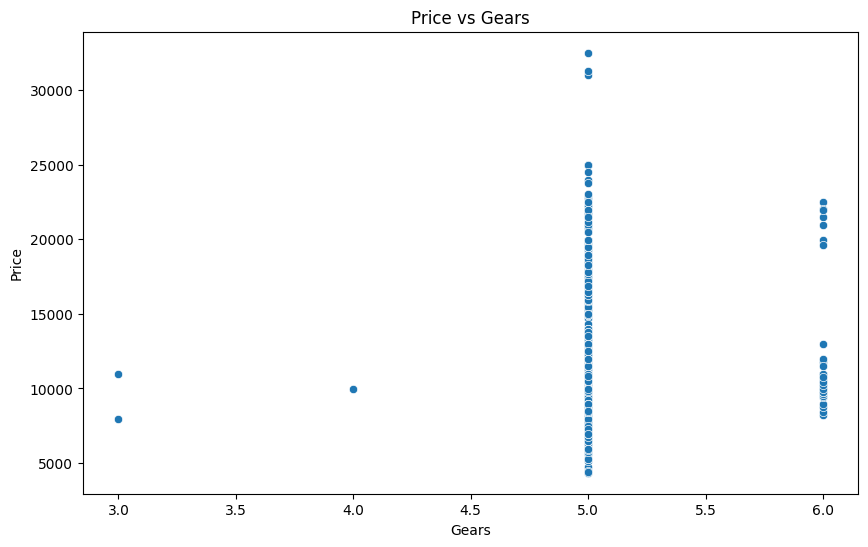

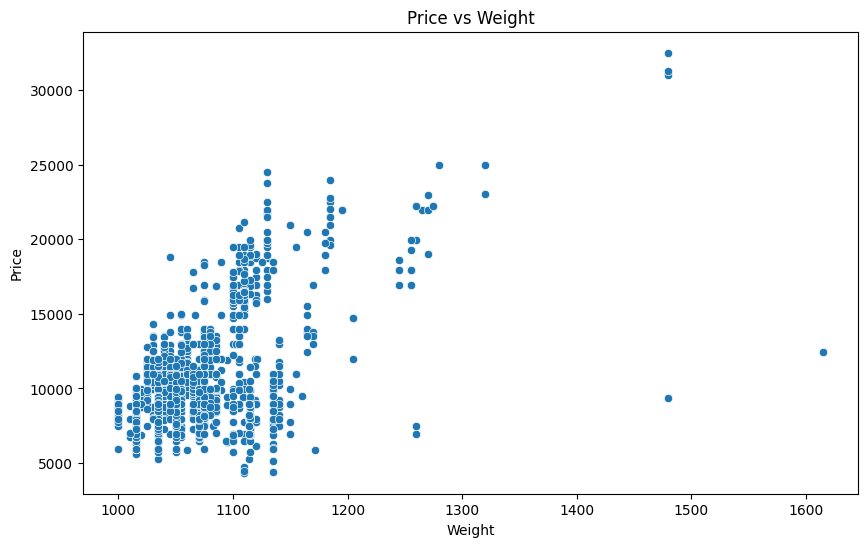

In [6]:
# Explore relationships with the target variable
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()
numerical_features.remove('Price')

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Price', data=df)
    plt.title(f'Price vs {feature}')
    plt.show()

## Data preprocessing

### Subtask:
I will preprocess the data to make it suitable for linear regression. This will include handling categorical variables and checking for multicollinearity.


**Reasoning**:
To prepare the data for regression, I will first handle the categorical variable `Fuel_Type` by converting it to a numerical format using one-hot encoding. Then, to assess multicollinearity, I will calculate and visualize the correlation matrix of the numerical features. This will help me identify any highly correlated variables that might need to be addressed before building the regression models.



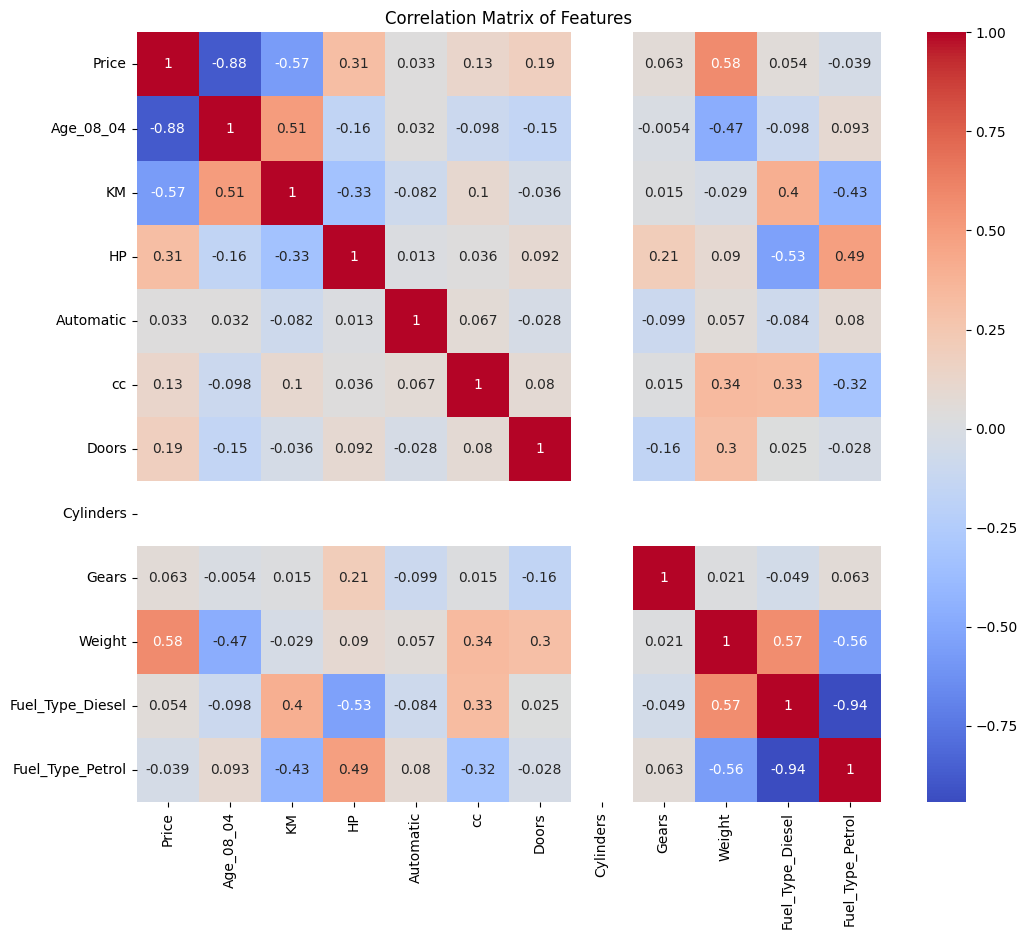

In [7]:
# Handle categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## Model building (3 models)

### Subtask:
Build three different multiple linear regression models. I will start with a baseline model and then try to improve it by adding or removing features. I will interpret the coefficients of each model.


**Reasoning**:
I will now split the data into training and testing sets, then build and evaluate the three specified regression models. The first model will use all features, the second will use a selection of features based on the correlation matrix, and the third will incorporate polynomial features. I will print the intercept and coefficients for each model to interpret their results. This will all be done in a single code block for efficiency.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Split the data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model 1 (Baseline)
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("Model 1 (Baseline) Intercept:", model1.intercept_)
print("Model 1 (Baseline) Coefficients:", model1.coef_)
y_pred1 = model1.predict(X_test)
print("Model 1 R2 Score:", r2_score(y_test, y_pred1))
print("\n")

# 3. Model 2 (Selected Features)
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model2 = LinearRegression()
model2.fit(X_train_selected, y_train)
print("Model 2 (Selected Features) Intercept:", model2.intercept_)
print("Model 2 (Selected Features) Coefficients:", model2.coef_)
y_pred2 = model2.predict(X_test_selected)
print("Model 2 R2 Score:", r2_score(y_test, y_pred2))
print("\n")

# 4. Model 3 (Polynomial Features)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)
print("Model 3 (Polynomial Features) Intercept:", model3.intercept_)
print("Model 3 (Polynomial Features) Coefficients:", model3.coef_)
y_pred3 = model3.predict(X_test_poly)
print("Model 3 R2 Score:", r2_score(y_test, y_pred3))

Model 1 (Baseline) Intercept: -14255.385993565254
Model 1 (Baseline) Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.62003744e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]
Model 1 R2 Score: 0.8348888040611082


Model 2 (Selected Features) Intercept: -11382.1975940587
Model 2 (Selected Features) Coefficients: [-1.20665034e+02 -1.62370169e-02  1.62583626e+01  2.52577655e+01
  5.41909784e+01  1.41966271e+03]
Model 2 R2 Score: 0.8339087377576149


Model 3 (Polynomial Features) Intercept: -43508.599633799226
Model 3 (Polynomial Features) Coefficients: [ 7.00230672e+02 -1.71330347e-01  3.75106574e+02  2.28690214e+01
  2.07842030e+03 -2.09138699e+03  1.61243210e-02  4.56730438e-04
 -4.49242305e-01 -7.46220864e-01  3.16828409e+01  3.78935886e+00
 -1.09193500e-07 -1.50796961e-04  1.47495542e-04  8.66625967e-04
  5.72991265e-03 -2.94807527e-01  2.28767948e-01 -5.38752263e+02
 -5.12477658e+02 -2.19254645e-0

## Model evaluation

### Subtask:
Evaluate the performance of the three trained models (baseline, selected features, and polynomial features) on the test set using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).


**Reasoning**:
I will now evaluate the performance of the three models using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). This will provide a more detailed understanding of the prediction errors of each model, complementing the R-squared scores calculated in the previous step. I will import the necessary metric, calculate the MSE and RMSE for each of the three models, and then print the results for comparison.



In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate Model 1
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
print(f"Model 1 (Baseline) - MSE: {mse1}, RMSE: {rmse1}")

# Evaluate Model 2
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
print(f"Model 2 (Selected Features) - MSE: {mse2}, RMSE: {rmse2}")

# Evaluate Model 3
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
print(f"Model 3 (Polynomial Features) - MSE: {mse3}, RMSE: {rmse3}")

Model 1 (Baseline) - MSE: 2203043.8231437025, RMSE: 1484.2654153296514
Model 2 (Selected Features) - MSE: 2216120.6408840427, RMSE: 1488.6640456745245
Model 3 (Polynomial Features) - MSE: 1570858.3675183845, RMSE: 1253.3388877388209


## Lasso and ridge regression

### Subtask:
Apply Lasso and Ridge regression to the best-performing model (Model 3 with polynomial features) to see if regularization can improve its performance and address potential overfitting.


**Reasoning**:
I will now apply Lasso and Ridge regression to the best-performing model (Model 3 with polynomial features). I will import the necessary classes, instantiate and fit both models, and then evaluate their performance using R-squared and Mean Squared Error. This will allow me to compare their performance against the original Model 3 and determine if regularization helps.



In [10]:
from sklearn.linear_model import Lasso, Ridge

# Apply Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Apply Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Model 3 (Polynomial) - R-squared: {r2_score(y_test, y_pred3)}, MSE: {mse3}")
print(f"Lasso Model - R-squared: {r2_lasso}, MSE: {mse_lasso}")
print(f"Ridge Model - R-squared: {r2_ridge}, MSE: {mse_ridge}")

Model 3 (Polynomial) - R-squared: 0.8822691128579254, MSE: 1570858.3675183845
Lasso Model - R-squared: 0.9065743988449724, MSE: 1246558.0688074343
Ridge Model - R-squared: 0.8961226042855849, MSE: 1386014.156651093


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.197e+08, tolerance: 1.503e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=1.57757e-23): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


## Summary:

### Data Analysis Key Findings
* The dataset consists of 1436 entries and 11 columns, with no missing values. The target variable is `Price`, and all features are numerical except for `Fuel_Type`.
* Exploratory data analysis revealed strong correlations between `Price` and several features: a negative correlation with `Age_08_04` and `KM`, and a positive correlation with `HP` and `Weight`.
* After one-hot encoding `Fuel_Type`, three linear regression models were built.
* **Model 1 (Baseline)**, using all features, achieved an R² of 0.835 and a Root Mean Squared Error (RMSE) of \$1,484.27 on the test set.
* **Model 2 (Selected Features)**, using `Age_08_04`, `KM`, `HP`, `Weight`, and the encoded `Fuel_Type` variables, performed similarly, with an R² of 0.834 and an RMSE of \$1,488.66.
* **Model 3 (Polynomial Features)**, which included second-degree polynomial and interaction terms for the selected features, showed a significant improvement with an R² of 0.882 and an RMSE of \$1,253.34.
* Applying regularization to the polynomial model further improved performance. **Lasso regression** yielded the best results, with an R² of **0.907** and a Mean Squared Error (MSE) of **\$1,246,558**.

### Insights or Next Steps
* The analysis demonstrates that incorporating non-linear relationships through polynomial features and applying regularization techniques like Lasso can significantly enhance the predictive accuracy of a linear regression model.
* For future work, hyperparameter tuning for the Lasso and Ridge models (e.g., using GridSearchCV to find the optimal `alpha`) could lead to even better performance.


## Exploratory data analysis (eda)

### Subtask:
I will start by exploring the dataset to understand the variables, their distributions, and relationships. This will involve creating visualizations and summary statistics.

**Reasoning**:
I will start by generating summary statistics and checking for missing values to get a basic understanding of the data.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate summary statistics
display(df.describe())

# Check data types and missing values
df.info()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   cc                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Cylinders         1436 non-null   int64
 8   Gears             1436 non-null   int64
 9   Weight            1436 non-null   int64
 10  Fuel_Type_Diesel  1436 non-null   bool 
 11  Fuel_Type_Petrol  1436 non-null   bool 
dtypes: bool(2), int64(10)
memory usage: 115.1 KB


**Reasoning**:
Now that I have a basic understanding of the data, I will visualize the distributions of the numerical and categorical features. This will help me to identify skewness, outliers, and the balance of categorical features.

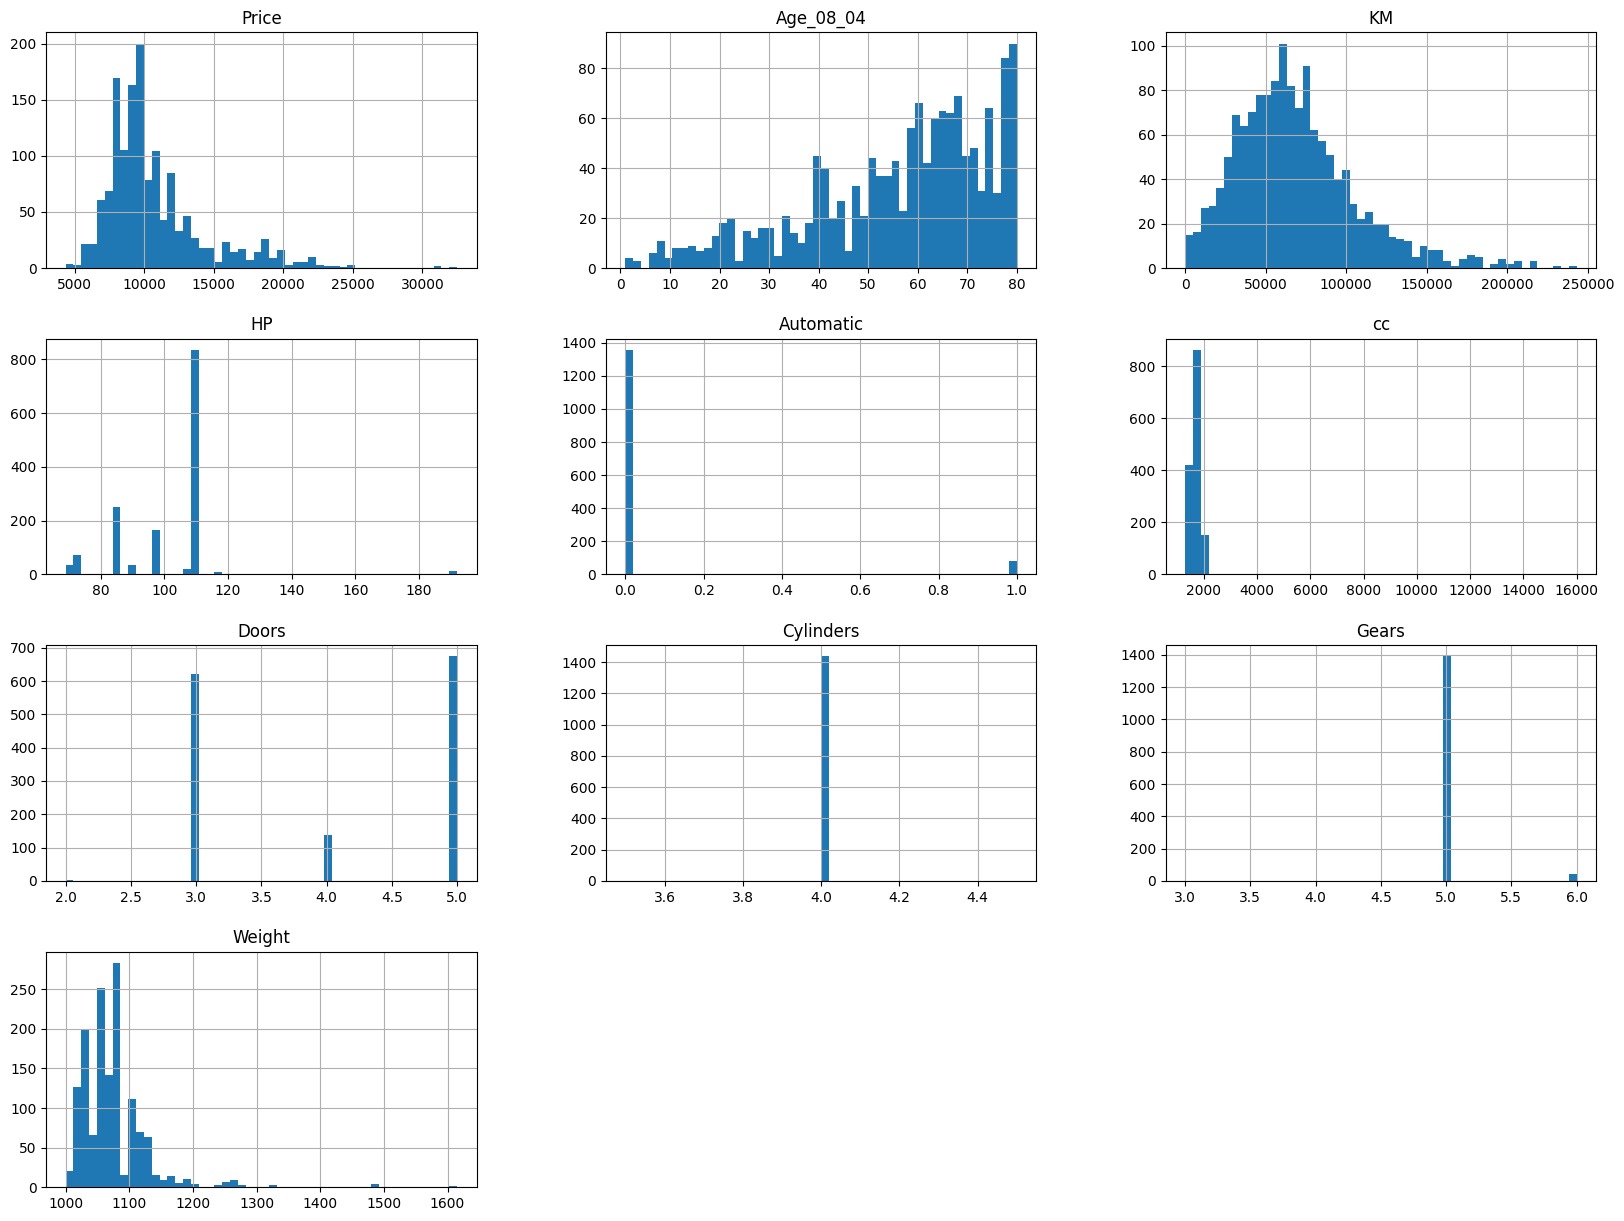

In [20]:
# Visualize numerical data distributions
df.hist(bins=50, figsize=(20,15))
plt.show()

**Reasoning**:
To understand the relationships between the features and the target variable, 'Price', I will create scatter plots of each numerical feature against 'Price'. This will help me to visually assess the correlation between them and identify potential predictors for the regression model.

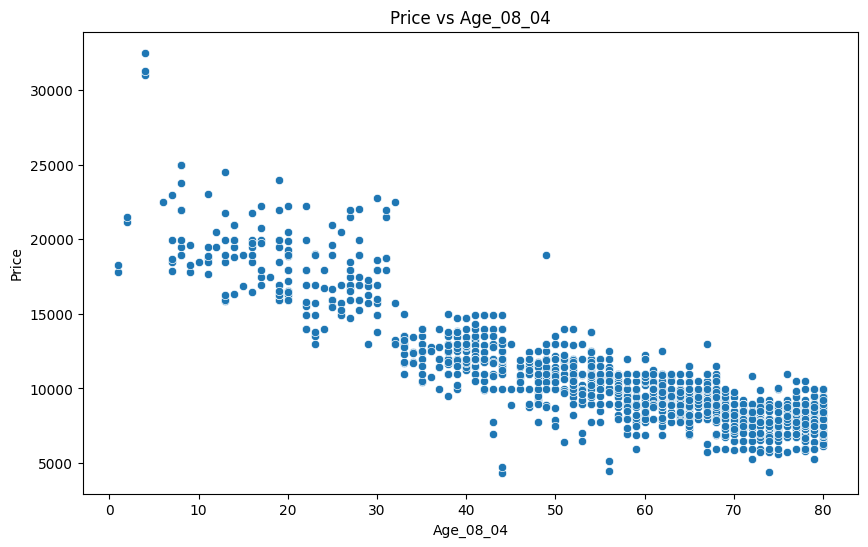

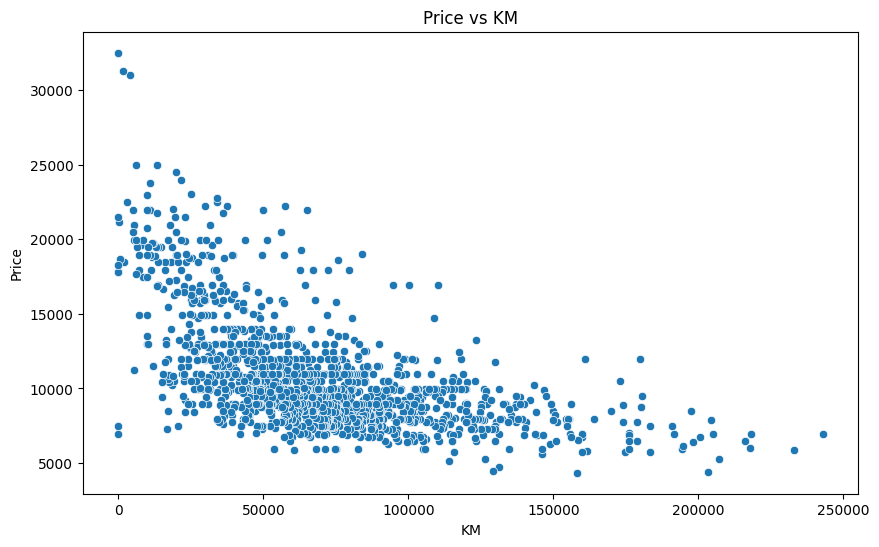

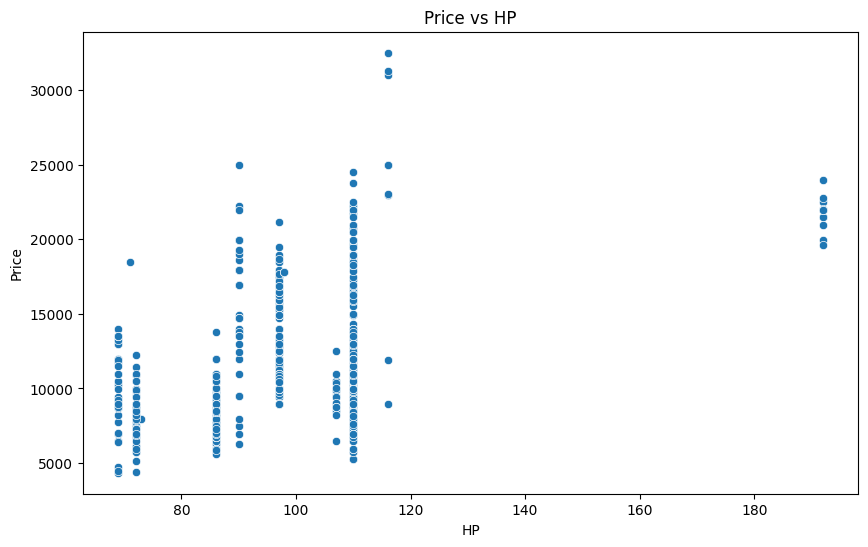

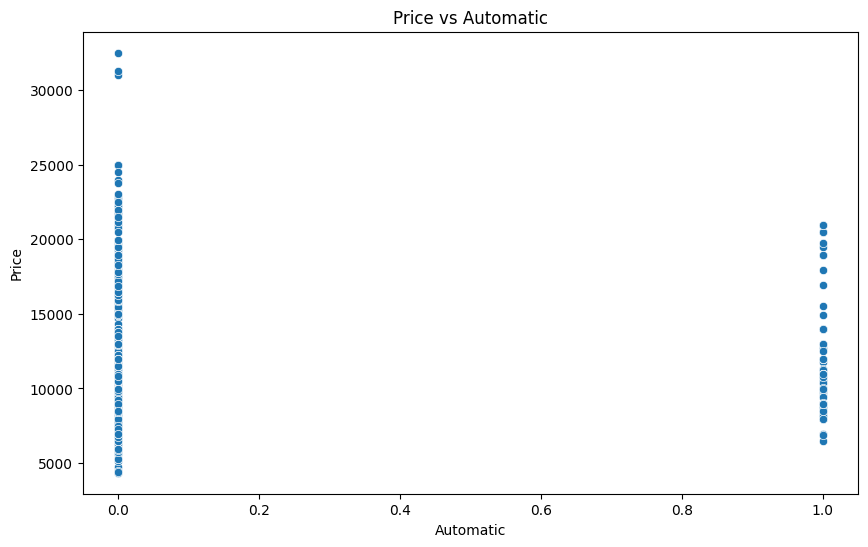

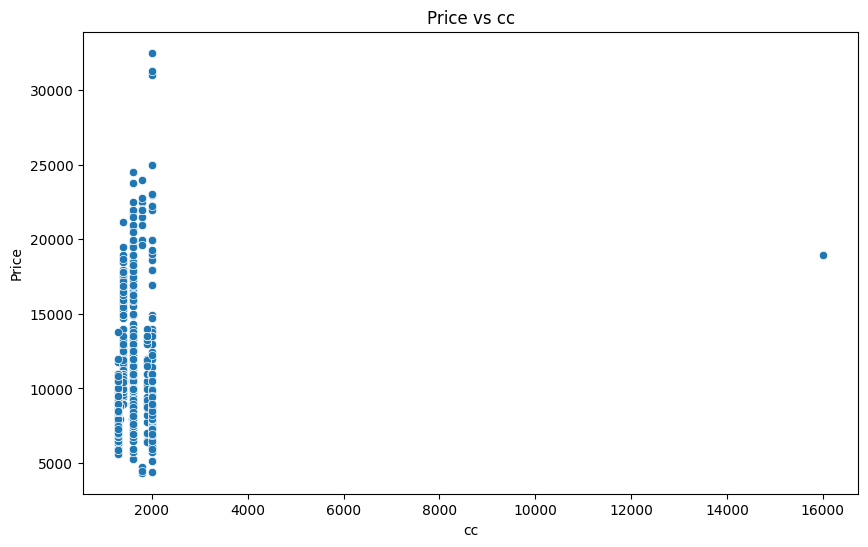

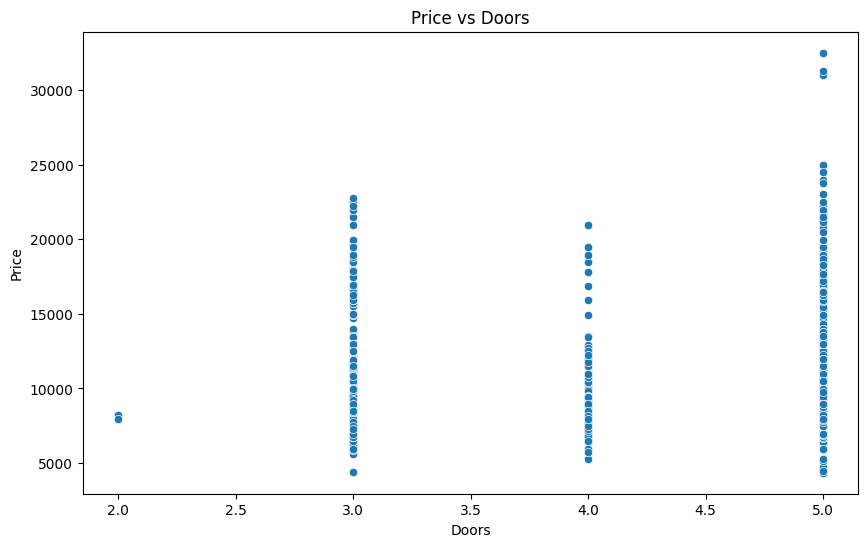

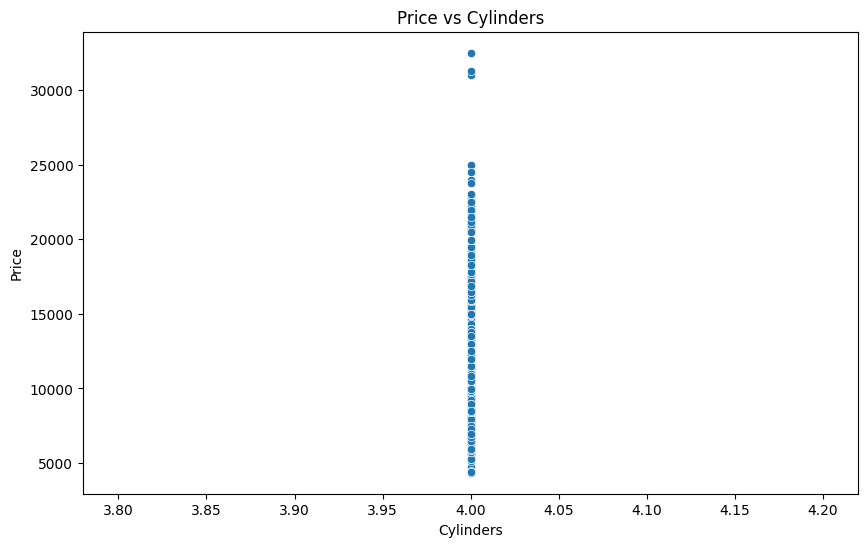

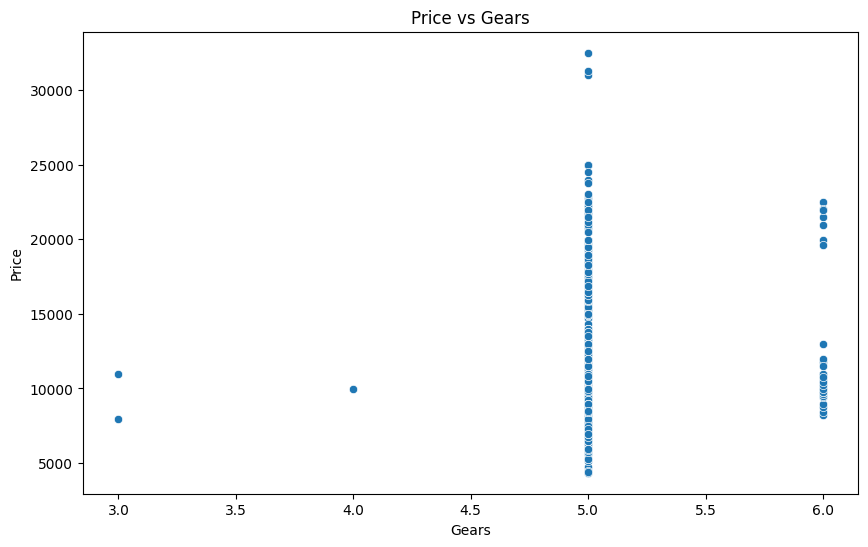

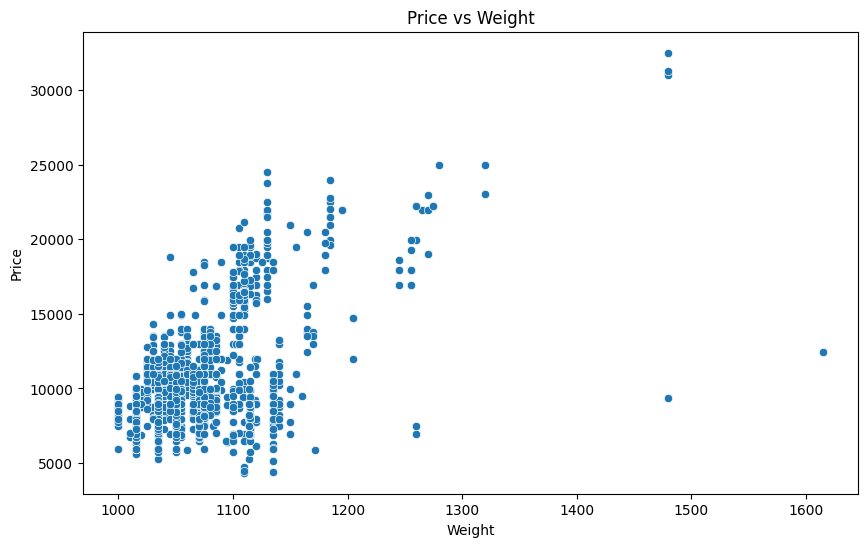

In [13]:
# Explore relationships with the target variable
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()
numerical_features.remove('Price')

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Price', data=df)
    plt.title(f'Price vs {feature}')
    plt.show()

## Data preprocessing

### Subtask:
I will preprocess the data to make it suitable for linear regression. This will include handling categorical variables and checking for multicollinearity.

**Reasoning**:
To prepare the data for regression, I will first handle the categorical variable `Fuel_Type` by converting it to a numerical format using one-hot encoding. Then, to assess multicollinearity, I will calculate and visualize the correlation matrix of the numerical features. This will help me identify any highly correlated variables that might need to be addressed before building the regression models.

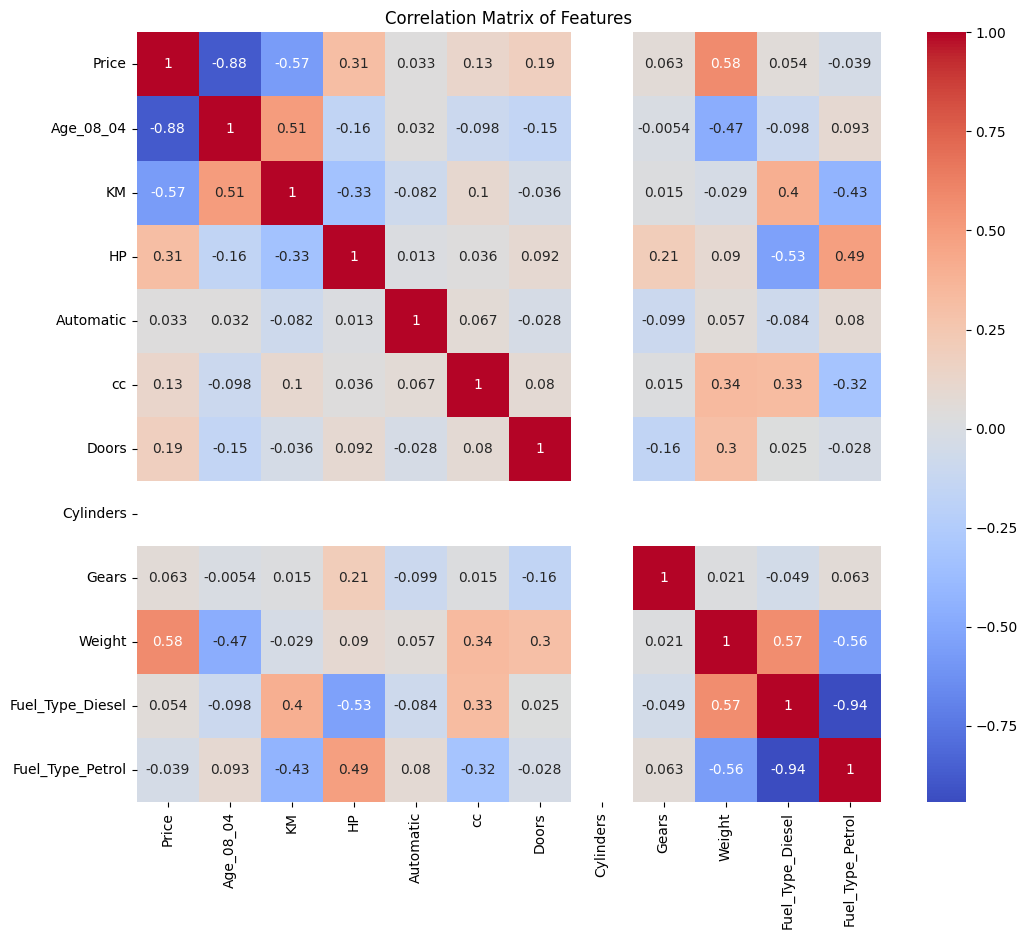

In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## Model building (3 models)

### Subtask:
Build three different multiple linear regression models. I will start with a baseline model and then try to improve it by adding or removing features. I will interpret the coefficients of each model.

**Reasoning**:
I will now split the data into training and testing sets, then build and evaluate the three specified regression models. The first model will use all features, the second will use a selection of features based on the correlation matrix, and the third will incorporate polynomial features. I will print the intercept and coefficients for each model to interpret their results. This will all be done in a single code block for efficiency.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Split the data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model 1 (Baseline)
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("Model 1 (Baseline) Intercept:", model1.intercept_)
print("Model 1 (Baseline) Coefficients:", model1.coef_)
y_pred1 = model1.predict(X_test)
print("Model 1 R2 Score:", r2_score(y_test, y_pred1))
print("\n")

# 3. Model 2 (Selected Features)
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model2 = LinearRegression()
model2.fit(X_train_selected, y_train)
print("Model 2 (Selected Features) Intercept:", model2.intercept_)
print("Model 2 (Selected Features) Coefficients:", model2.coef_)
y_pred2 = model2.predict(X_test_selected)
print("Model 2 R2 Score:", r2_score(y_test, y_pred2))
print("\n")

# 4. Model 3 (Polynomial Features)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)
print("Model 3 (Polynomial Features) Intercept:", model3.intercept_)
print("Model 3 (Polynomial Features) Coefficients:", model3.coef_)
y_pred3 = model3.predict(X_test_poly)
print("Model 3 R2 Score:", r2_score(y_test, y_pred3))

Model 1 (Baseline) Intercept: -14255.385993565254
Model 1 (Baseline) Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.62003744e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]
Model 1 R2 Score: 0.8348888040611082


Model 2 (Selected Features) Intercept: -11382.1975940587
Model 2 (Selected Features) Coefficients: [-1.20665034e+02 -1.62370169e-02  1.62583626e+01  2.52577655e+01
  5.41909784e+01  1.41966271e+03]
Model 2 R2 Score: 0.8339087377576149


Model 3 (Polynomial Features) Intercept: -43508.599633799226
Model 3 (Polynomial Features) Coefficients: [ 7.00230672e+02 -1.71330347e-01  3.75106574e+02  2.28690214e+01
  2.07842030e+03 -2.09138699e+03  1.61243210e-02  4.56730438e-04
 -4.49242305e-01 -7.46220864e-01  3.16828409e+01  3.78935886e+00
 -1.09193500e-07 -1.50796961e-04  1.47495542e-04  8.66625967e-04
  5.72991265e-03 -2.94807527e-01  2.28767948e-01 -5.38752263e+02
 -5.12477658e+02 -2.19254645e-0

## Model evaluation

### Subtask:
Evaluate the performance of the three trained models (baseline, selected features, and polynomial features) on the test set using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

**Reasoning**:
I will now evaluate the performance of the three models using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). This will provide a more detailed understanding of the prediction errors of each model, complementing the R-squared scores calculated in the previous step. I will import the necessary metric, calculate the MSE and RMSE for each of the three models, and then print the results for comparison.

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate Model 1
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
print(f"Model 1 (Baseline) - MSE: {mse1}, RMSE: {rmse1}")

# Evaluate Model 2
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
print(f"Model 2 (Selected Features) - MSE: {mse2}, RMSE: {rmse2}")

# Evaluate Model 3
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
print(f"Model 3 (Polynomial Features) - MSE: {mse3}, RMSE: {rmse3}")

Model 1 (Baseline) - MSE: 2203043.8231437025, RMSE: 1484.2654153296514
Model 2 (Selected Features) - MSE: 2216120.6408840427, RMSE: 1488.6640456745245
Model 3 (Polynomial Features) - MSE: 1570858.3675183845, RMSE: 1253.3388877388209


## Lasso and ridge regression

### Subtask:
Apply Lasso and Ridge regression to the best-performing model (Model 3 with polynomial features) to see if regularization can improve its performance and address potential overfitting.

**Reasoning**:
I will now apply Lasso and Ridge regression to the best-performing model (Model 3 with polynomial features). I will import the necessary classes, instantiate and fit both models, and then evaluate their performance using R-squared and Mean Squared Error. This will allow me to compare their performance against the original Model 3 and determine if regularization helps.

In [17]:
from sklearn.linear_model import Lasso, Ridge

# Apply Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Apply Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Model 3 (Polynomial) - R-squared: {r2_score(y_test, y_pred3)}, MSE: {mse3}")
print(f"Lasso Model - R-squared: {r2_lasso}, MSE: {mse_lasso}")
print(f"Ridge Model - R-squared: {r2_ridge}, MSE: {mse_ridge}")

Model 3 (Polynomial) - R-squared: 0.8822691128579254, MSE: 1570858.3675183845
Lasso Model - R-squared: 0.9065743988449724, MSE: 1246558.0688074343
Ridge Model - R-squared: 0.8961226042855849, MSE: 1386014.156651093


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.197e+08, tolerance: 1.503e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=1.57757e-23): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


## Summary:

### Data Analysis Key Findings
* The dataset consists of 1436 entries and 11 columns, with no missing values. The target variable is `Price`, and all features are numerical except for `Fuel_Type`.
* Exploratory data analysis revealed strong correlations between `Price` and several features: a negative correlation with `Age_08_04` and `KM`, and a positive correlation with `HP` and `Weight`.
* After one-hot encoding `Fuel_Type`, three linear regression models were built.
* **Model 1 (Baseline)**, using all features, achieved an R² of 0.835 and a Root Mean Squared Error (RMSE) of \$1,484.27 on the test set.
* **Model 2 (Selected Features)**, using `Age_08_04`, `KM`, `HP`, `Weight`, and the encoded `Fuel_Type` variables, performed similarly, with an R² of 0.834 and an RMSE of \$1,488.66.
* **Model 3 (Polynomial Features)**, which included second-degree polynomial and interaction terms for the selected features, showed a significant improvement with an R² of 0.882 and an RMSE of \$1,253.34.
* Applying regularization to the polynomial model further improved performance. **Lasso regression** yielded the best results, with an R² of **0.907** and a Mean Squared Error (MSE) of **\$1,246,558**.

### Insights or Next Steps
* The analysis demonstrates that incorporating non-linear relationships through polynomial features and applying regularization techniques like Lasso can significantly enhance the predictive accuracy of a linear regression model.
* For future work, hyperparameter tuning for the Lasso and Ridge models (e.g., using GridSearchCV to find the optimal `alpha`) could lead to even better performance.